# Lab 05 - Exam problem

Author: Gary Marigliano, based on the work of Hector Satizabal

Date: 2018.03

## Instructions:

* Read this notebook
* Do/Answer where **TODO student** is specified
* The folder structure is like this:

```
fuzzy_systems
├── core
└── view
```

* `core` contains core classes like membership_functions, fuzzy_rules,...
* `view` contains classes used to display what the core classes do.
* Please keep this folder structure if you write additional classes.


**TODO student** Read and explore the code provided both in this folder.

In [1]:
 # change 'inline' to 'notebook' to enable 3D plots
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [11]:
from fuzzy_systems.core.linguistic_variables.linguistic_variable import LinguisticVariable
from fuzzy_systems.core.linguistic_variables.two_points_lv import TwoPointsPDLV
from fuzzy_systems.core.linguistic_variables.three_points_lv import ThreePointsLV
from fuzzy_systems.core.membership_functions.lin_piece_wise_mf import LinPWMF
from fuzzy_systems.core.membership_functions.trap_mf import TrapMF
from fuzzy_systems.core.membership_functions.singleton_mf import SingletonMF
from fuzzy_systems.core.rules.fuzzy_rule import FuzzyRule, Antecedent, Consequent
from fuzzy_systems.core.rules.default_fuzzy_rule import DefaultFuzzyRule
from fuzzy_systems.core.fis.fis import FIS, OR_max, AND_min, MIN, COA_func
from fuzzy_systems.core.fis.singleton_fis import SingletonFIS

from fuzzy_systems.view.lv_viewer import LinguisticVariableViewer
from fuzzy_systems.view.fis_viewer import FISViewer
from fuzzy_systems.view.fis_surface import show_surface

## Introduction

In this notebook we will look at the exam problem. As a student you are an expert at planning which exam you must prepare first given a set of exams. For example, you know that you need to prepare the math exam a bit sooner than just 2 hours before it begins. But the same logic does not necessarily apply for all courses ;-)

Your task is to design from scratch a FIS where you are the expert. Indeed, we will give you the variables and their range but you are going to create the linguistic variables, the fuzzy rules and therefore the FIS.

* Inputs variables
  * **(D)ifficulty**: how hard the exam would be ?
    * from 0 (easy) to 10 (hard)
  * **(I)mportance**: how important the exam is ? Maybe you can ignore this exam because you already had good grades before. Or on the opposite, you absolutely need to nail this exam to pass the year.
    * from 0 (yolo) to 10 (my student's life depends on it)
  * **(R)emaining work**: You already studied a bit before so maybe there is no much work to do left. Or, on the opposite, you need to deep dive into the slides for the first time in your life.
    * from 0 (just skim the slides) to 10 (learn everything from scratch)
  * **(T)ime to exam**: When is the exam, tomorrow ? in 2 months ?
    * from 0 (in days, so today) to 30 (in days, so in 1 month)
    
* Output variables
  * **(P)riority**: Given the input variables above, what should be the priority of an exam ?
    * from 0 (lowest priority, i.e. this exam will be the last you will start to revise) to 1 (highest priority, i.e. this exam will be the first you will start to revise)
    

## Step 1 - Create the FIS

**TODO student**

* Using the specification above (input and output variables names and ranges) create a FIS from scratch
  * Create the linguistic variables you find relevant in terms of number of labels, name of the labels, shape of the MFs, ...
  * Create the fuzzy rules you find relevent in terms of number of rules, number of antecedents/consequents, presence or absence of the default rule, presence or absence of NOT conditions... Note: you are not forced to use all the variables for each rule, you are free to build your FIS the way you want. The only constraint is to be able to **justify every choice you made**.
  * Type of FIS 
* Justify your choices with a few words. **The justification is the main part of the evaluation so please be precise and complete**
* Show your FIS using FISViewer


## Step 2 - Do you trust your FIS ? aka Test the FIS

Now that you have created your FIS it is time to test it against your personnal feelings.

**TODO student**

* Test your FIS on the following cases (the 5 courses below). Do the output priorities seems coherent ? If not edit your FIS to improve the outputs.
  * Course 1: Difficulty=8, Importance=4, Remaining work=30, Time to exam=4
  * Course 2: Difficulty=4, Importance=6, Remaining work=50, Time to exam=6
  * Course 3: Difficulty=10, Importance=7, Remaining work=10, Time to exam=10
  * Course 4: Difficulty=2, Importance=3, Remaining work=80, Time to exam=3
  * Course 5: Difficulty=6, Importance=9, Remaining work=40, Time to exam=14
* How the systems behave if the days pass but you have not progressed with your revision ? i.e. only the variable T(ime to exam) changes from t to t-1. How the priorities change? Does that seems coherent to you? Friendly reminder: maybe the function `show_surface()` can be useful.
* Ask yourself additional questions (between 4-6) to ask to your FIS to test it. For example test the following assumption: "The sooner the exam is the higher will the priority be".
* For each question justify your answers with plots and sentences.
* Confront your FIS against your personnal feelings. For example, a math exam is more likely to be difficult than a communication exam. You could create several additional courses with a dummy context (like the 5 courses above). For example, let's imagine that Course 6 is a Java exam scheduled tomorrow and you are a beast in Java so Difficulty=2, Importance=8, Remaining work=10, Time to work=1.
* Additional questions:
  * How your FIS behave with extreme values ? e.g. difficulty, importance and remaining work set to maximum and time to exam set to mimimum ?
  * Set N-2 variables to fixed values and plot using `show_surface()` the behaviour of 2 input variables. Comment the result with a few words. For example, do the input values correctly behave when their values change.
  * Generally, can you indicate some cons or weaknesses a such FIS could have? Does your FIS (or any FIS modelling the exam problem) incorporates everything to fully answer the exam problem? Is there something you know your FIS cannot capture that might help to predict the priority?
* **You may want to tune your FIS a couple of times in order to find a good FIS, so don't hesitate to go back to step 1**

Note: you may want to reuse classes from previous labs (such as ThreePointsLV for example). If so, please make sure that you fixed these in relation to the labs feedbacks.

Note: if there are odd behaviours, try to fix your FIS. If after several attempts to fix your FIS you found no way to fix it, then provide or guess some explanations/hypothesis.

Note: you should not need to implement new classes/functions but if you do please justify it and make sure there are working properly.

## Conclusion

This lab is less code-oriented but requires more (sort of) scientific thinking. Please show that you played and explored the behaviour with your FIS. Ask yourself many questions and confront your FIS against them. **Note that a minimal effort in doing so will result in a minimal grade.** You will mainly be evaluated on the justification and on your analysis. Remember you are the expert and this means you need to approve or disapprove the FIS you created.

-----------------

# Exercice - please answer below

**Step 1**: 
We first start to implement a simple mamdani FIS to have a better representation of the outputs. For simplication we used ThreePointsLV to represent the linguistic variables. We used a default rule to prevent cases that we didnt think of. By default the priority is low, we will then focus on all the cases where the priority must be high. We used the not operator to reduct the number of rules.
We constructed our fuzzy rules as follow : 
- First of all, if importance is high, the priority will alway be high
- If the difficulty is high then if the importance is not low, the priority will be high
- If the remaining work is high then if time to exam is low, the priority will be high
- Finally if the time to exam is low, the difficulty is not low and the remaining work is not not low, the priority will be high

The resulting FIS is represented below : 

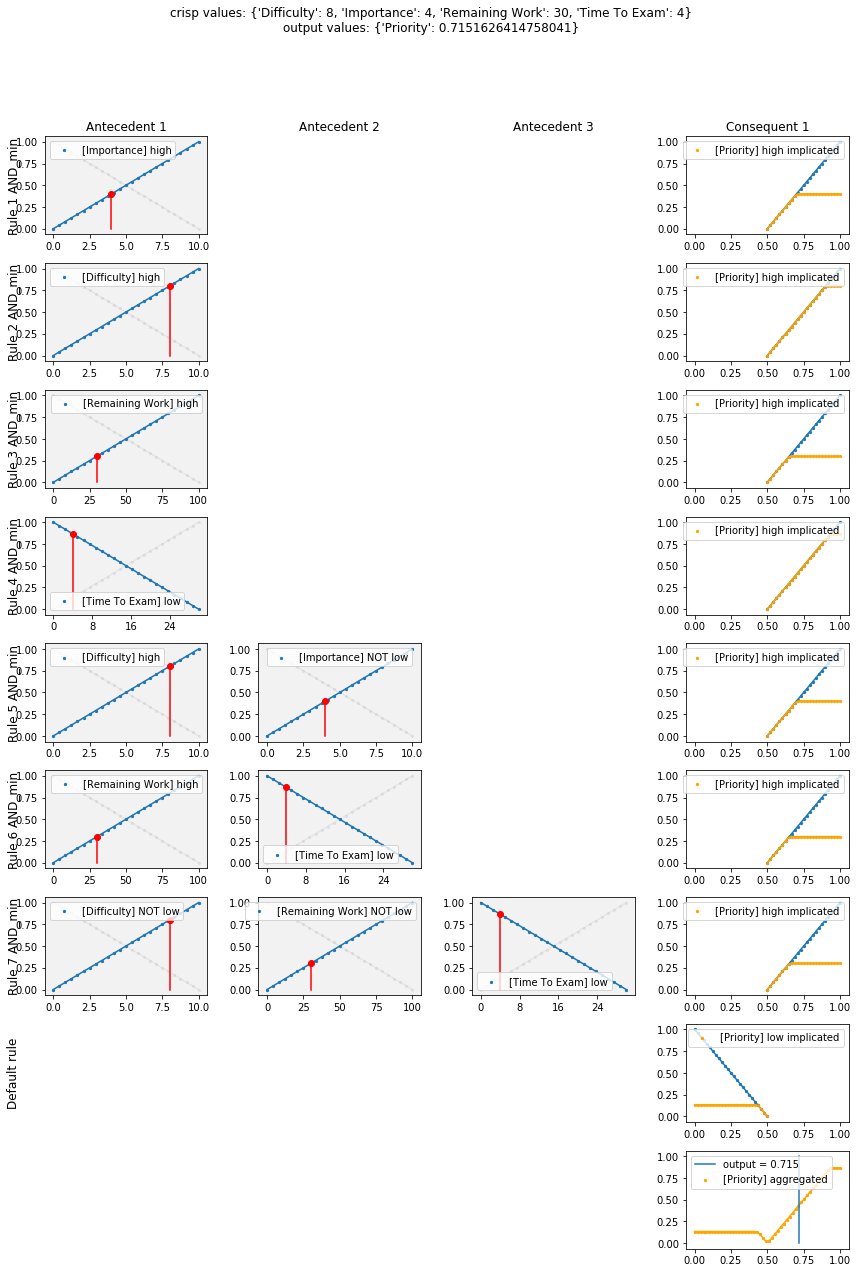

In [16]:
difficulty = TwoPointsPDLV(name='Difficulty', p=0, d=10)

importance = TwoPointsPDLV(name='Importance', p=0, d=10)

remaining_work = TwoPointsPDLV(name='Remaining Work', p=0, d=100)

time_to_exam = TwoPointsPDLV(name='Time To Exam', p=0, d=30)

priority = ThreePointsLV(name='Priority', p1=0, p2=0.5, p3=1)

# Shoul we use Singleton ???
#priority = LinguisticVariable(name='Priority', ling_values_dict={
#    'low': SingletonMF(0),
#    'medium': SingletonMF(0.5),
#    'high': SingletonMF(1)
#})


default_rule = DefaultFuzzyRule( cons=[Consequent(priority, 'low')], impl_func=MIN)

exams_rules = [
    FuzzyRule(ant_act_func=AND_min,
              ants=[Antecedent(importance, 'high')],
              cons=[Consequent(priority, 'high')], impl_func=MIN),
    
    FuzzyRule(ant_act_func=AND_min,
              ants=[Antecedent(difficulty, 'high')],
              cons=[Consequent(priority, 'high')], impl_func=MIN),
    
    FuzzyRule(ant_act_func=AND_min,
              ants=[Antecedent(remaining_work, 'high')],
              cons=[Consequent(priority, 'high')], impl_func=MIN),
    
    FuzzyRule(ant_act_func=AND_min,
              ants=[Antecedent(time_to_exam, 'low')],
              cons=[Consequent(priority, 'high')], impl_func=MIN),

    FuzzyRule(ant_act_func=AND_min,
              ants=[Antecedent(difficulty, 'high'),
                    Antecedent(importance, 'low', is_not=True)],
              cons=[Consequent(priority, 'high')], impl_func=MIN),
    
    FuzzyRule(ant_act_func=AND_min,
              ants=[Antecedent(remaining_work, 'high'),
                    Antecedent(time_to_exam, 'low')],
              cons=[Consequent(priority, 'high')], impl_func=MIN),
    
    FuzzyRule(ant_act_func=AND_min,
              ants=[Antecedent(difficulty, 'low', is_not=True),
                    Antecedent(remaining_work, 'low', is_not=True),
                    Antecedent(time_to_exam, 'low')],
              cons=[Consequent(priority, 'high')], impl_func=MIN)
]

#fis = FIS(rules=exams_rules, aggr_func=np.max,
#          defuzz_func=COA_func)

#Default rule ??
fis = FIS(rules=exams_rules, aggr_func=np.max,
          defuzz_func=COA_func, default_rule=default_rule)

input_values = {'Difficulty': 8, 'Importance': 4, 'Remaining Work': 30, 'Time To Exam': 4}
fis.predict(input_values)
fisv = FISViewer(fis)
fisv.show()

#input_values = {'Difficulty': 4, 'Importance': 6, 'Remaining Work': 50, 'Time To Exam': 6}
#fis.predict(input_values)
#fisv = FISViewer(fis)
#fisv.show()

#input_values = {'Difficulty': 10, 'Importance': 7, 'Remaining Work': 10, 'Time To Exam': 10}
#fis.predict(input_values)
#fisv = FISViewer(fis)
#fisv.show()

#input_values = {'Difficulty': 2, 'Importance': 3, 'Remaining Work': 80, 'Time To Exam': 3}
#fis.predict(input_values)
#fisv = FISViewer(fis)
#fisv.show()

#input_values = {'Difficulty': 6, 'Importance': 9, 'Remaining Work': 40, 'Time To Exam': 14}
#fis.predict(input_values)
#fisv = FISViewer(fis)
#fisv.show()

**Step 2**
Now that we have created our FIS it is time to test it against our personnal feelings.

* Test your FIS on the following cases (the 5 courses below). Do the output priorities seems coherent ? If not edit your FIS to improve the outputs.
  * Course 1: Difficulty=8, Importance=4, Remaining work=30, Time to exam=4   ==>> Priority = 0.53
  * Course 2: Difficulty=4, Importance=6, Remaining work=50, Time to exam=6   ==>> Priority = 0.47
  * Course 3: Difficulty=10, Importance=7, Remaining work=10, Time to exam=10 ==>> Priority = 0.69
  * Course 4: Difficulty=2, Importance=3, Remaining work=80, Time to exam=3   ==>> Priority = 0.54
  * Course 5: Difficulty=6, Importance=9, Remaining work=40, Time to exam=14  ==>> Priority = 0.67
  
 > The outputs seems to be coherent.
 
* How the systems behave if the days pass but you have not progressed with your revision ? i.e. only the variable T(ime to exam) changes from t to t-1. How the priorities change? Does that seems coherent to you? Friendly reminder: maybe the function `show_surface()` can be useful.
 > In order to analyse the evolution of the priority with the time remaining before the exam, we simply created a plot representing the time to exam vs the priority, when the other parameters stay constants(D=8, I=5, R=50).
 


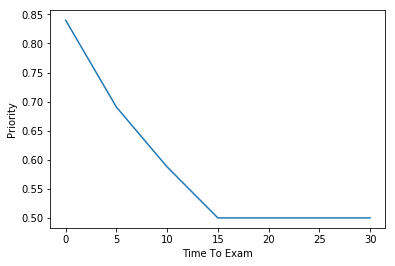

In [22]:
times_to_exam = np.array([30, 25, 20, 15, 10, 5, 0])

def f(x):
    return fis.predict({'Difficulty': 5, 
                          'Importance': 5, 
                          'Remaining Work': 50, 
                          'Time To Exam': x})["Priority"]

f = np.vectorize(f, otypes=[np.float])
priorities = f(times_to_exam)

plt.plot(times_to_exam, priorities)
plt.ylabel('Priority')
plt.xlabel('Time To Exam')
plt.show()

>The evolution of the priority variable seems to be coherent BLABLAVBLAVLAVBSIKHJSBKWBKJSNQ

* Ask yourself additional questions (between 4-6) to ask to your FIS to test it. For example test the following assumption: "The sooner the exam is the higher will the priority be". For each question justify your answers with plots and sentences.
> (Question 1) : The more important the exam is, the highter the priority will be 

    > We can see that BLBLABLABAKMALNKJBWKJNBKWNXKJNWKJBXJKWKJNKJWNK

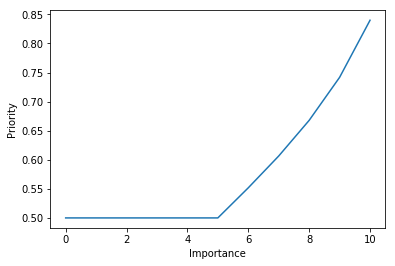

In [21]:
importances = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

def f(x):
    return fis.predict({'Difficulty': 5, 
                          'Importance': x, 
                          'Remaining Work': 50, 
                          'Time To Exam': 15})["Priority"]

f = np.vectorize(f, otypes=[np.float])
priorities = f(importances)

plt.plot(importances, priorities)
plt.ylabel('Priority')
plt.xlabel('Importance')
plt.show()

> (Question 2) : The more work I have to procude for the exam, the highter the priority will be 

    > We can see that BLBLABLABAKMALNKJBWKJNBKWNXKJNWKJBXJKWKJNKJWNK

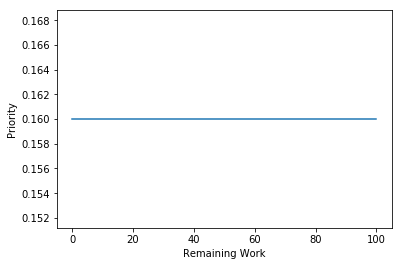

In [6]:
remainings_work = np.array([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

def f(x):
    return fis.predict({'Difficulty': 5, 
                          'Importance': 5, 
                          'Remaining Work': x, 
                          'Time To Exam': 15})["Priority"]

f = np.vectorize(f, otypes=[np.float])
priorities = f(remainings_work)

plt.plot(remainings_work, priorities)
plt.ylabel('Priority')
plt.xlabel('Remaining Work')
plt.show()

> (Question 3) : The more difficult the exam is, the highter the priority will be 

    > We can see that BLBLABLABAKMALNKJBWKJNBKWNXKJNWKJBXJKWKJNKJWNK

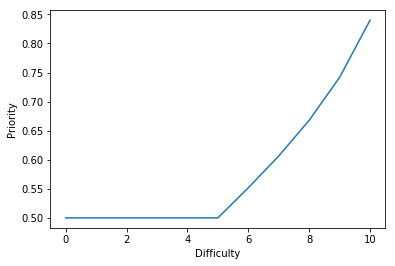

In [20]:
difficulties = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

def f(x):
    return fis.predict({'Difficulty': x, 
                          'Importance': 5, 
                          'Remaining Work': 50, 
                          'Time To Exam': 15})["Priority"]

f = np.vectorize(f, otypes=[np.float])
priorities = f(difficulties)

plt.plot(difficulties, priorities)
plt.ylabel('Priority')
plt.xlabel('Difficulty')
plt.show()

> (Question 4) : The more important the exam is, the highter the priority will be 

    > We can see that BLBLABLABAKMALNKJBWKJNBKWNXKJNWKJBXJKWKJNKJWNK

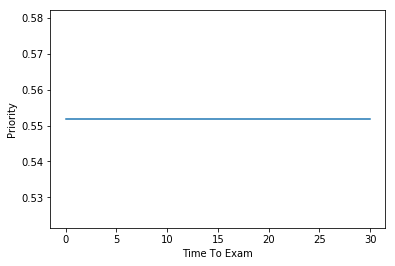

In [8]:
times_to_exam = np.array([30, 25, 20, 15, 10, 5, 0])

def f(x):
    return fis.predict({'Difficulty': 8, 
                          'Importance': 4, 
                          'Remaining Work': 29, 
                          'Time To Exam': x})["Priority"]

f = np.vectorize(f, otypes=[np.float])
priorities = f(times_to_exam)

plt.plot(times_to_exam, priorities)
plt.ylabel('Priority')
plt.xlabel('Time To Exam')
plt.show()

> (Question 5) : The more important the exam is, the highter the priority will be 

    > We can see that BLBLABLABAKMALNKJBWKJNBKWNXKJNWKJBXJKWKJNKJWNK

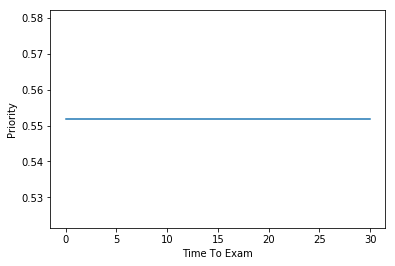

In [9]:
times_to_exam = np.array([30, 25, 20, 15, 10, 5, 0])

def f(x):
    return fis.predict({'Difficulty': 8, 
                          'Importance': 4, 
                          'Remaining Work': 29, 
                          'Time To Exam': x})["Priority"]

f = np.vectorize(f, otypes=[np.float])
priorities = f(times_to_exam)

plt.plot(times_to_exam, priorities)
plt.ylabel('Priority')
plt.xlabel('Time To Exam')
plt.show()

> (Question 6) : The more important the exam is, the highter the priority will be 

    > We can see that BLBLABLABAKMALNKJBWKJNBKWNXKJNWKJBXJKWKJNKJWNK

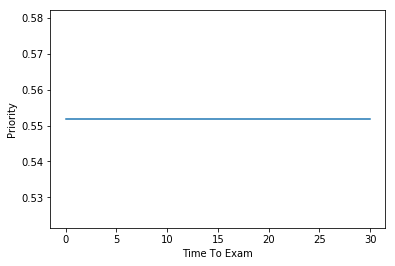

In [10]:
times_to_exam = np.array([30, 25, 20, 15, 10, 5, 0])

def f(x):
    return fis.predict({'Difficulty': 8, 
                          'Importance': 4, 
                          'Remaining Work': 29, 
                          'Time To Exam': x})["Priority"]

f = np.vectorize(f, otypes=[np.float])
priorities = f(times_to_exam)

plt.plot(times_to_exam, priorities)
plt.ylabel('Priority')
plt.xlabel('Time To Exam')
plt.show()

* Confront your FIS against your personnal feelings. For example, a math exam is more likely to be difficult than a communication exam. You could create several additional courses with a dummy context (like the 5 courses above). For example, let's imagine that Course 6 is a Java exam scheduled tomorrow and you are a beast in Java so Difficulty=2, Importance=8, Remaining work=10, Time to work=1.

  * Course 1, LFA : Difficulty=8, Importance=10, Remaining work=99, Time to exam=30   ==>> Priority = 0.53 TO REPLACE!
  * Course 2, MLG : Difficulty=8, Importance=9, Remaining work=90, Time to exam=15   ==>> Priority = 0.47 TO REPLACE!
  * Course 3, SCALA : Difficulty=9, Importance=7, Remaining work=45, Time to exam=10 ==>> Priority = 0.69 TO REPLACE!
  * Course 4, VTK : Difficulty=3, Importance=3, Remaining work=60, Time to exam=10   ==>> Priority = 0.54 TO REPLACE!
  * Course 5, CLD : Difficulty=1, Importance=5, Remaining work=10, Time to exam=7  ==>> Priority = 0.67 TO REPLACE!


* Additional questions:
  * How your FIS behave with extreme values ? e.g. difficulty, importance and remaining work set to maximum and time to exam set to mimimum ?
  * Set N-2 variables to fixed values and plot using `show_surface()` the behaviour of 2 input variables. Comment the result with a few words. For example, do the input values correctly behave when their values change.
  * Generally, can you indicate some cons or weaknesses a such FIS could have? Does your FIS (or any FIS modelling the exam problem) incorporates everything to fully answer the exam problem? Is there something you know your FIS cannot capture that might help to predict the priority?
      > cons: 
  
      > pros: 
  
      > No the FIS do not incorporate everything to fully answer the exam problem, it is very difficult to represent all the possibilities, so we try to approach a good result............

Note: you may want to reuse classes from previous labs (such as ThreePointsLV for example). If so, please make sure that you fixed these in relation to the labs feedbacks.

Note: if there are odd behaviours, try to fix your FIS. If after several attempts to fix your FIS you found no way to fix it, then provide or guess some explanations/hypothesis.

Note: you should not need to implement new classes/functions but if you do please justify it and make sure there are working properly.

### To submit

* Please make a zip called `lfa_labXX_YY.zip` where `XX` is the lab number and `YY` is your familly name. For example: `lfa_lab02_smith.zip`. 
* The mail's subject is `[LFA] rendu labXX` where `XX` is the lab number

The zip must contain all _needed_ the files to run this notebook. That is, don't send your virtualenv (only the requirements.txt). **If any additional steps are required to run your notebook(s)/code, please add a README.md where you indicate all the needed steps to reproduce your work.**

Note: Your notebooks must run completely even after the Jupyter kernel has been restarted. To ensure it will be the case when your lab will be reviewed, please select in the top menu "Kernel -> Restart and Run all" and check that the output of each cell is the desired output you want to submit.